### Import important Libraries

In [1]:
import pandas as pd # for tabular data manipulation
import numpy as np # for numeric computing
import matplotlib.pyplot as plt # for ploting /visualization
import matplotlib as matplot # visulization
import seaborn as sns # visualization

In [3]:
from sklearn.model_selection import train_test_split 
import sklearn.ensemble
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Import CSV

In [ ]:
data = pd.read_csv('C:/Users/swana/Desktop/Data file.csv')

### Data Exploration

In [4]:
data=data.drop(data.columns[0], axis=1)
data=data.drop(data.columns[34], axis=1)
data["pdate"] = pd.to_datetime(data["pdate"])

In [5]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

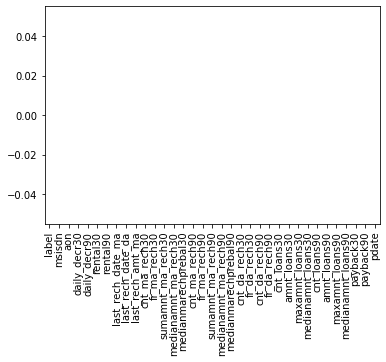

In [7]:
data.isna().sum().plot(kind="bar")
data.isnull().sum()

In [8]:
len(pd.unique(data["msisdn"])) 

186243

In [9]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
col_names=data.columns
col_names

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe80c1c9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe80c38f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe80c382c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe80c3df08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe80c3dfc8>],
 'means': []}

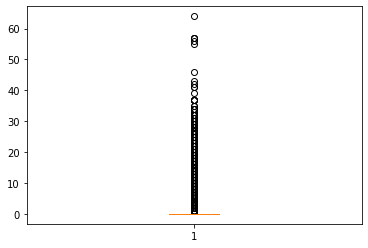

In [11]:
fig,ax=plt.subplots()
ax.boxplot(data["fr_da_rech90"])

In [12]:
data["fr_da_rech90"].min()

0

### Data Cleaning

In [15]:
print(sum(data['label']==1))
print(sum(data['label']==0))
len(data.index)

168814
22618


191432

### Data Visualization

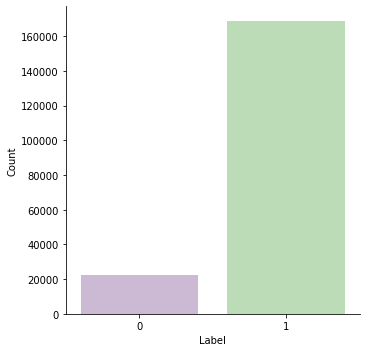

In [16]:
g=sns.catplot(x="label",data=data,kind="count",palette="PRGn",alpha=1)
g.set(xlabel="Label",ylabel="Count")
plt.show()

### Feature Selection (Logistic Regression)

In [17]:
Xsel=data.iloc[:,2:34]
Ysel=data.iloc[:,0]

In [18]:
bestfeatures=SelectKBest(score_func=chi2,k=20)

In [19]:
fit=bestfeatures.fit(Xsel,Ysel)

In [20]:
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(Xsel.columns)

In [21]:
featureScores=pd.concat([datacolumns,datascores],axis=1)
featureScores.columns=['Specs','Score']
featureScores

,Specs,Score
0,aon,4.231090e+05
1,daily_decr30,8.317511e+07
2,daily_decr90,1.009154e+08
3,rental30,4.135908e+06
4,rental90,9.780793e+06
5,last_rech_date_ma,2.843251e+04
6,last_rech_date_da,5.622739e+03
7,last_rech_amt_ma,7.355466e+06
8,cnt_ma_rech30,4.621537e+04
9,fr_ma_rech30,2.527655e+04


In [22]:
print(featureScores.nlargest(20,"Score"))

                   Specs         Score
15     sumamnt_ma_rech90  1.748127e+08
2           daily_decr90  1.009154e+08
10     sumamnt_ma_rech30  9.667902e+07
1           daily_decr30  8.317511e+07
4               rental90  9.780793e+06
11  medianamnt_ma_rech30  7.443334e+06
7       last_rech_amt_ma  7.355466e+06
16  medianamnt_ma_rech90  5.122516e+06
3               rental30  4.135908e+06
12  medianmarechprebal30  2.673504e+06
0                    aon  4.231090e+05
17  medianmarechprebal90  3.438528e+05
27          amnt_loans90  2.195785e+05
18         cnt_da_rech30  1.993128e+05
23          amnt_loans30  1.206017e+05
13         cnt_ma_rech90  8.352936e+04
8          cnt_ma_rech30  4.621537e+04
5      last_rech_date_ma  2.843251e+04
9           fr_ma_rech30  2.527655e+04
14          fr_ma_rech90  2.067414e+04


In [23]:
colnames=["label","sumamnt_ma_rech90","daily_decr90","sumamnt_ma_rech30","daily_decr30","rental90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","rental30","medianmarechprebal30","aon","medianmarechprebal90","amnt_loans90","cnt_da_rech30","amnt_loans30","cnt_ma_rech90","cnt_ma_rech30","last_rech_date_ma","fr_ma_rech30","fr_ma_rech90"]
len(colnames)

21

#### Visualizing the distribution of each variable

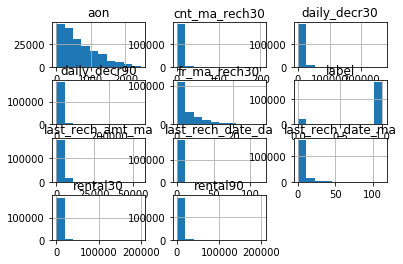

In [24]:
hist = data.iloc[:,0:12].hist()

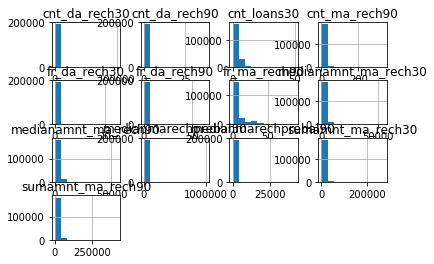

In [25]:
hist = data.iloc[:,12:25].hist()

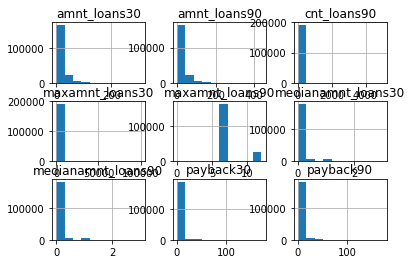

In [26]:
hist = data.iloc[:,25:35].hist()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191432 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 191432 non-null  int64         
 1   msisdn                191432 non-null  object        
 2   aon                   191432 non-null  float64       
 3   daily_decr30          191432 non-null  float64       
 4   daily_decr90          191432 non-null  float64       
 5   rental30              191432 non-null  float64       
 6   rental90              191432 non-null  float64       
 7   last_rech_date_ma     191432 non-null  float64       
 8   last_rech_date_da     191432 non-null  float64       
 9   last_rech_amt_ma      191432 non-null  int64         
 10  cnt_ma_rech30         191432 non-null  int64         
 11  fr_ma_rech30          191432 non-null  float64       
 12  sumamnt_ma_rech30     191432 non-null  float64       
 13 

In [28]:
### Filter dataframe to use only important features
df=data[colnames]   #includes Target variable "Label"
df1=df.iloc[:,1:]   #does not include Target variable "Label"
df1.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,3078,3065.150000,3078.0,3055.050000,260.13,1539.0,1539,1539.0,220.13,7.50,272.0,7.50,12,0.0,12,2,2,2.0,21.0,21
1,5787,12124.750000,5787.0,12122.000000,3691.26,5787.0,5787,5787.0,3691.26,61.04,712.0,61.04,12,0.0,12,1,1,20.0,0.0,0
2,1539,1398.000000,1539.0,1398.000000,900.13,1539.0,1539,1539.0,900.13,66.32,535.0,66.32,6,0.0,6,1,1,3.0,0.0,0
3,947,21.228000,0.0,21.228000,159.42,0.0,947,947.0,159.42,0.00,241.0,2.50,12,0.0,12,1,0,41.0,0.0,0
4,23496,150.619333,20029.0,150.619333,1098.90,2309.0,2309,2888.0,1098.90,29.00,947.0,35.00,42,0.0,42,8,7,4.0,2.0,2


### Normalizing data

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values

### Define the independent and dependent variable

## Build Models

In [32]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) 


##### Describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

### 1. Logistic Regression

In [33]:
# logistic regression object 
lr = LogisticRegression(solver='lbfgs', max_iter=400) 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.43      0.01      0.02      6690
           1       0.88      1.00      0.94     50740

    accuracy                           0.88     57430
   macro avg       0.66      0.50      0.48     57430
weighted avg       0.83      0.88      0.83     57430



In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 118074
Before OverSampling, counts of label '0': 15928 

After OverSampling, the shape of train_X: (236148, 20)
After OverSampling, the shape of train_y: (236148,) 

After OverSampling, counts of label '1': 118074
After OverSampling, counts of label '0': 118074


In [35]:
lr1 = LogisticRegression(solver='lbfgs', max_iter=400) 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 5341  1349]
 [14989 35751]]
              precision    recall  f1-score   support

           0       0.26      0.80      0.40      6690
           1       0.96      0.70      0.81     50740

    accuracy                           0.72     57430
   macro avg       0.61      0.75      0.60     57430
weighted avg       0.88      0.72      0.77     57430



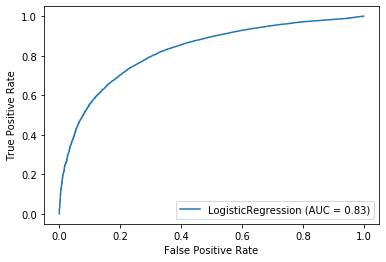

In [37]:
metrics.plot_roc_curve(lr1, X_test, y_test) 
plt.show()       

### 2. Linear SVM

In [38]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_res, y_train_res)

SVC(kernel='linear')

In [39]:
y_pred = svclassifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5261  1429]
 [14631 36109]]
              precision    recall  f1-score   support

           0       0.26      0.79      0.40      6690
           1       0.96      0.71      0.82     50740

    accuracy                           0.72     57430
   macro avg       0.61      0.75      0.61     57430
weighted avg       0.88      0.72      0.77     57430



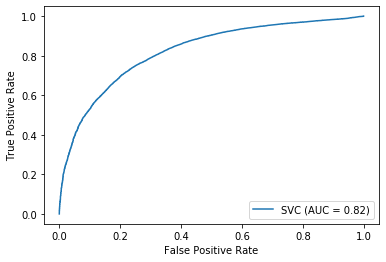

In [41]:
metrics.plot_roc_curve(svclassifier, X_test, y_test) 
plt.show()  

### 3. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)
y_pred1 = clf.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[ 3587  3103]
 [ 5910 44830]]
              precision    recall  f1-score   support

           0       0.38      0.54      0.44      6690
           1       0.94      0.88      0.91     50740

    accuracy                           0.84     57430
   macro avg       0.66      0.71      0.68     57430
weighted avg       0.87      0.84      0.85     57430



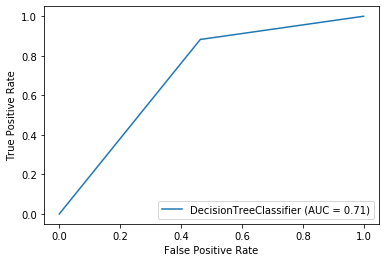

In [44]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()  

### 4. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_res,y_train_res)
y_pred2=rfc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 3642  3048]
 [ 3006 47734]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      6690
           1       0.94      0.94      0.94     50740

    accuracy                           0.89     57430
   macro avg       0.74      0.74      0.74     57430
weighted avg       0.89      0.89      0.89     57430



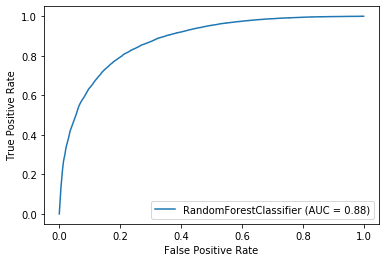

In [47]:
metrics.plot_roc_curve(rfc, X_test, y_test) 
plt.show()  

### 5. Gradient Boost Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_res,y_train_res)
y_pred3=gbc.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[ 4392  2298]
 [ 7045 43695]]
              precision    recall  f1-score   support

           0       0.38      0.66      0.48      6690
           1       0.95      0.86      0.90     50740

    accuracy                           0.84     57430
   macro avg       0.67      0.76      0.69     57430
weighted avg       0.88      0.84      0.85     57430



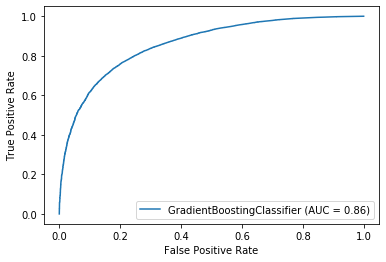

In [50]:
metrics.plot_roc_curve(gbc, X_test, y_test) 
plt.show()  